In [1]:
import os
import io
import spacy
import pathlib 
import warnings
import fr_core_news_sm

import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from spacy.lang.fr.stop_words import STOP_WORDS
warnings.filterwarnings('ignore')
nlp = fr_core_news_sm.load()

In [2]:
df = pd.read_csv('https://go.aws/314bBDq')

In [3]:
df

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
1,e3be4f9c9e0b9572bfb2a5f88497bb14,NaN,2,2017-09-29 17:29:00,17:29,17,Ven,NaN,NaN,2017-09,0,0
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
3,fa330e5891a1bb486c3e9bf95c098726,NaN,5,2017-09-29 15:52:00,15:52,15,Ven,NaN,NaN,2017-09,0,0
4,c1a693206aee1a2412d4bd9e45b80ec5,NaN,3,2017-09-29 15:29:00,15:29,15,Ven,NaN,NaN,2017-09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299630,299be03d0583edfb9625a7947fbc631a,NaN,5,2012-11-11 11:46:00,11:46,11,Dim,NaN,NaN,2012-11,0,0
299631,39b4e66e3b78d4f8ce60a6b4801b862d,NaN,5,2012-11-11 11:46:00,11:46,11,Dim,NaN,NaN,2012-11,0,0
299632,924eb5ec58470cd00c16060e6ee3c316,NaN,5,2012-11-11 11:46:00,11:46,11,Dim,NaN,NaN,2012-11,0,0
299633,5b484e48319355c12a941577d74a5839,NaN,5,2012-11-11 11:45:00,11:45,11,Dim,NaN,NaN,2012-11,0,0


In [4]:
df = df[(df["review_lang"] == "french")]
df

,user_id,review,stars,date_format,time_of_day,hour_of_day,day_of_week,review_format,review_lang,month_year,review_len,review_nb_words
0,efb62a167fee5cf3678b24427de8e31f,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,2017-09-29 18:17:00,18:17,18,Ven,génial fabuleux exceptionnel j aimerais qu...,french,2017-09,115,19
2,1b8e5760162d867e9b9ca80f645bdc60,"Toujours aussi magic, féerique !",5,2017-09-29 16:46:00,16:46,16,Ven,toujours aussi magic féerique,french,2017-09,32,4
11,726b1a3e2664e8b075129bcd643dbf56,En vacances en région parisienne nous nous som...,2,2017-09-29 00:37:00,00:37,0,Ven,en vacances en région parisienne nous nous som...,french,2017-09,172,25
12,8a71763fbb3da7436b957681b24cc404,Tropbeaufinalpleinlesyeuxoreil,5,2017-09-29 00:16:00,00:16,0,Ven,tropbeaufinalpleinlesyeuxoreil,french,2017-09,30,1
23,ce7abd7798ee036d667c0ad84b85daa7,L'univers Disney reste merveilleux. Toutefois ...,4,2017-09-28 20:24:00,20:24,20,Jeu,l univers disney reste merveilleux toutefois ...,french,2017-09,148,23
...,...,...,...,...,...,...,...,...,...,...,...,...
295057,384ed9434f58334e7fae2e74d5d2d282,Toujours aussi magique même si à la fin du séj...,5,2014-05-25 19:24:00,19:24,19,Dim,toujours aussi magique même si à la fin du séj...,french,2014-05,76,16
295549,86d27b7258afd29111a0da0017198985,Séjour au top!!! Mes enfants les plus heureux ...,5,2014-07-22 17:01:00,17:01,17,Mar,séjour au top mes enfants les plus heureux ...,french,2014-07,166,31
298475,f56bb024a5beea5ed52acc6119bf4255,"Magnifique un monde parfait <span class=""""""""_4...",5,2014-03-18 13:27:00,13:27,13,Mar,magnifique un monde parfait lt,french,2014-03,32,5
298832,cb69d68eb5ebf7b654ab867012cb34b5,Oui j'ai aimé car j'adore disney et tout ce q...,4,2017-01-09 08:23:00,08:23,8,Lun,oui j ai aimé car j adore disney et tout ce qu...,french,2017-01,157,33


In [5]:
df = df[["review", "stars"]]
df

,review,stars
0,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5
2,"Toujours aussi magic, féerique !",5
11,En vacances en région parisienne nous nous som...,2
12,Tropbeaufinalpleinlesyeuxoreil,5
23,L'univers Disney reste merveilleux. Toutefois ...,4
...,...,...
295057,Toujours aussi magique même si à la fin du séj...,5
295549,Séjour au top!!! Mes enfants les plus heureux ...,5
298475,"Magnifique un monde parfait <span class=""""""""_4...",5
298832,Oui j'ai aimé car j'adore disney et tout ce q...,4


In [6]:
a = nlp("je la laisse, je veux la laisser, je l'ai laissée, je me suis laissé aller")
[element.lemma_ for element in a]

['je',
 'le',
 'laisse',
 ',',
 'je',
 'vouloir',
 'le',
 'laisser',
 ',',
 'je',
 "l'",
 'avoir',
 'laisser',
 ',',
 'je',
 'me',
 'être',
 'laisser',
 'aller']

In [7]:
df["review_clean"] = df["review"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" " or ch=="'"))
df["review_clean"] = df["review_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
df["review_clean"] = df["review_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) and (token.text not in STOP_WORDS)]))
df

,review,stars,review_clean
0,"Génial, fabuleux, exceptionnel ! J'aimerais qu...",5,génial fabuleux exceptionnel aimer walt disn...
2,"Toujours aussi magic, féerique !",5,magic féerique
11,En vacances en région parisienne nous nous som...,2,vacance région parisien décider visiter parc r...
12,Tropbeaufinalpleinlesyeuxoreil,5,tropbeaufinalpleinlesyeuxoreil
23,L'univers Disney reste merveilleux. Toutefois ...,4,univers disney merveilleux toutefois regrette ...
...,...,...,...
295057,Toujours aussi magique même si à la fin du séj...,5,magique fin séjour rotule lol
295549,Séjour au top!!! Mes enfants les plus heureux ...,5,séjour top enfant heureux vouloir voir personn...
298475,"Magnifique un monde parfait <span class=""""""""_4...",5,magnifique monde parfaire span class47e3 5mfr ...
298832,Oui j'ai aimé car j'adore disney et tout ce q...,4,oui aimer adore disney touche univers grand ...


In [8]:
mask = df.review_clean.apply(lambda x: type(x)==str)
mask.value_counts()

True    8474
Name: review_clean, dtype: int64

In [9]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="out_of_vocab") # instanciate the tokenizer
tokenizer.fit_on_texts(df.review_clean)
df["review_encoded"] = tokenizer.texts_to_sequences(df.review_clean)

In [10]:
reviews_pad = tf.keras.preprocessing.sequence.pad_sequences(df.review_encoded, padding="post")

In [11]:
xtrain, xval, ytrain, yval = train_test_split(reviews_pad,df.stars, test_size=0.3)

In [12]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [13]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [14]:
for review, star in train_batch.take(1):
  print(review, star)

tf.Tensor(
[[ 49  72 539 ...   0   0   0]
 [ 14  28   1 ...   0   0   0]
 [ 25 765   3 ...   0   0   0]
 ...
 [ 21  72 424 ...   0   0   0]
 [ 79 632 211 ...   0   0   0]
 [ 89 179  25 ...   0   0   0]], shape=(64, 443), dtype=int32) tf.Tensor(
[3 4 5 5 5 5 5 5 1 5 5 5 5 5 5 3 4 3 1 5 5 5 5 5 3 3 5 5 5 3 5 5 3 3 5 2 3
 4 5 3 5 4 5 5 5 4 5 5 4 5 5 5 5 5 5 3 5 5 3 4 5 5 5 5], shape=(64,), dtype=int64)


In [15]:

vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                           
            tf.keras.layers.Embedding(vocab_size+1, 8, input_shape=[review.shape[1],],name="embedding"),
                 
            tf.keras.layers.GlobalAveragePooling1D(),

                  
            tf.keras.layers.Dense(16, activation='relu'),

                  
            tf.keras.layers.Dense(1, activation="linear")
                ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 443, 8)            8008      
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,169
Trainable params: 8,169
Non-trainable params: 0
_________________________________________________________________


In [17]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [18]:
history = model.fit(train_batch, 
                    epochs=20, 
                    validation_data=val_batch)

Epoch 1/20
93/93 [==============================] - 1s 3ms/step - loss: 16.3772 - mean_absolute_error: 3.8515 - val_loss: 12.7406 - val_mean_absolute_error: 3.3552
Epoch 2/20
93/93 [==============================] - 0s 2ms/step - loss: 7.4038 - mean_absolute_error: 2.4713 - val_loss: 2.6992 - val_mean_absolute_error: 1.4955
Epoch 3/20
93/93 [==============================] - 0s 2ms/step - loss: 1.6602 - mean_absolute_error: 1.0956 - val_loss: 1.4347 - val_mean_absolute_error: 0.9523
Epoch 4/20
93/93 [==============================] - 0s 2ms/step - loss: 1.4344 - mean_absolute_error: 0.9607 - val_loss: 1.4071 - val_mean_absolute_error: 0.9449
Epoch 5/20
93/93 [==============================] - 0s 2ms/step - loss: 1.4070 - mean_absolute_error: 0.9502 - val_loss: 1.3836 - val_mean_absolute_error: 0.9390
Epoch 6/20
93/93 [==============================] - 0s 2ms/step - loss: 1.3829 - mean_absolute_error: 0.9408 - val_loss: 1.3614 - val_mean_absolute_error: 0.9262
Epoch 7/20
93/93 [========

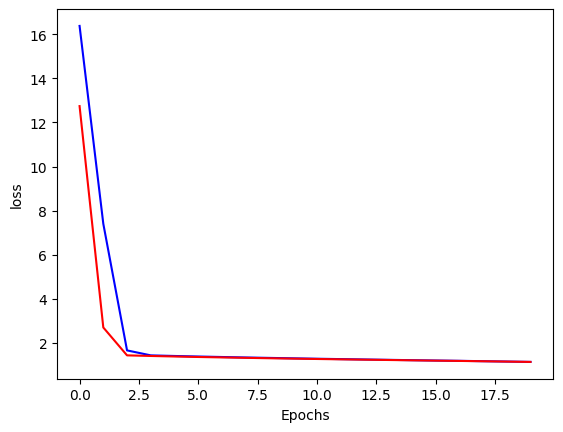

In [19]:
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

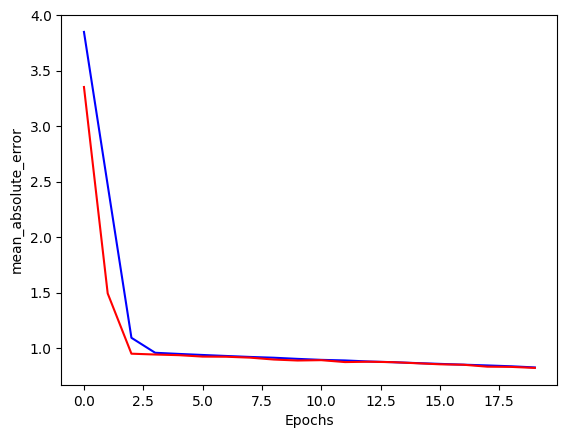

In [20]:
plt.plot(history.history["mean_absolute_error"], color="b")
plt.plot(history.history["val_mean_absolute_error"], color="r")
plt.ylabel("mean_absolute_error")
plt.xlabel("Epochs")
plt.show()

In [21]:
vocab = [value for value in tokenizer.index_word.values()]
vocab = vocab[:1000]
weights = model.get_layer('embedding').get_weights()[0]

log_dir = "/content/logs/embed"
os.makedirs(log_dir, exist_ok=True)
out_v = io.open(log_dir+"/vectors.tsv", 'w', encoding='utf-8')
out_m = io.open(log_dir+"/metadata.tsv", 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()